## Security Analytics -- Twitter Content Analysis ##

In [555]:
import pandas as pd
import numpy as np
import preprocessor as p
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as sp
import networkx as nx
from wordcloud import WordCloud
from sklearn.cluster import KMeans
import nltk
import simplemma
import re
import os.path
import spacy
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from collections import Counter
from matplotlib import style

In [556]:
df = pd.read_csv('results50000long408t414.csv', index_col=None, header=0, engine='python')
df.head(10)

,Unnamed: 0,userid,username,acctdesc,location,following,followers,totaltweets,usercreatedts,tweetid,...,quoted_status_id,quoted_status_userid,quoted_status_username,extractedts,INSULT,TOXICITY,IDENTITY_ATTACK,SEVERE_TOXICITY,THREAT,PROFANITY
0,197098,993127212810489856,RomanMoskal70,"Цікавлюся Україною. Цікавлюся Китаєм, особливо...",м. Харків/Kharkiv,63,2432,111304,2018-05-06 13:55:53,1645781322970075136,...,0,0.0,NaN,2023-04-11 23:00:19.924072,NaN,NaN,NaN,NaN,NaN,NaN
1,244270,1630078764464975874,AsadElhasi90,لا اله الا انت سبحانك أني كنت من الظالمين,libya,80,11,6622,2023-02-27 05:34:04,1646996698395230209,...,0,0.0,NaN,2023-04-15 01:53:57.844156,0.016785,0.072128,0.041777,0.004463,0.034422,0.014088
2,162238,3823392983,fgafatg,NaN,"Barcelona, Països Catalans",3626,3889,127199,2015-09-30 10:46:38,1646008872509865984,...,0,0.0,NaN,2023-04-12 05:28:13.769648,0.019870,0.087956,0.048738,0.004635,0.024753,0.023311
3,200210,845225862,jpeter1son,Veteran denouncer of pronounced nonsense\nNot ...,"Langley, VA",4053,3513,16091,2012-09-25 10:02:32,1646462925492613121,...,0,0.0,NaN,2023-04-13 11:15:42.154391,0.006553,0.012755,0.004125,0.001125,0.007508,0.011356
4,200417,1641117312219586564,DavidSt80377567,TRUMP 2024 \nAfter the Awakening...comes the R...,"Atlanta, GA",341,68,2448,2023-03-29 16:37:59,1645788927205466120,...,0,0.0,NaN,2023-04-11 15:13:06.092485,0.338892,0.351861,0.063859,0.007896,0.011586,0.098996
5,189150,1617983384852090882,Hi45733134,NaN,NaN,2,11,14823,2023-01-24 20:31:26,1646430040253407232,...,0,0.0,NaN,2023-04-13 09:48:25.274684,0.025671,0.096118,0.051581,0.008888,0.085497,0.027820
6,157509,1493586495667687424,CTcoins_,NaN,NaN,165,10,808,2022-02-15 14:03:12,1645000649757655041,...,0,0.0,NaN,2023-04-09 11:15:21.378268,0.029273,0.113677,0.055673,0.004807,0.026307,0.016889
7,193696,868512251300507649,ArnoldNetakoy,"Угрозу миру представляют коммунисты, никогда н...",NaN,31,157,41159,2017-05-27 17:00:31,1645112625221476356,...,0,0.0,NaN,2023-04-09 17:54:01.737207,0.012263,0.044884,0.013747,0.002441,0.023717,0.012073
8,135195,245914702,aeroscouting,"Helicopters when I can, airplanes when I can't...",NaN,857,1446,8975,2011-02-01 18:51:16,1644914415152791553,...,0,0.0,NaN,2023-04-09 05:21:19.001769,0.007684,0.011812,0.003552,0.000854,0.006991,0.010126
9,193092,1477391786146512900,WStreetholics,I'm a stock market enthusiast who loves to div...,NaN,168,30,295,2022-01-01 21:30:34,1646090189301751810,...,0,0.0,NaN,2023-04-12 13:03:30.891353,0.008083,0.015770,0.004088,0.001140,0.007664,0.014567


In [557]:
df = df[df['TOXICITY'].notna()]
df.head()

,Unnamed: 0,userid,username,acctdesc,location,following,followers,totaltweets,usercreatedts,tweetid,...,quoted_status_id,quoted_status_userid,quoted_status_username,extractedts,INSULT,TOXICITY,IDENTITY_ATTACK,SEVERE_TOXICITY,THREAT,PROFANITY
1,244270,1630078764464975874,AsadElhasi90,لا اله الا انت سبحانك أني كنت من الظالمين,libya,80,11,6622,2023-02-27 05:34:04,1646996698395230209,...,0,0.0,NaN,2023-04-15 01:53:57.844156,0.016785,0.072128,0.041777,0.004463,0.034422,0.014088
2,162238,3823392983,fgafatg,NaN,"Barcelona, Països Catalans",3626,3889,127199,2015-09-30 10:46:38,1646008872509865984,...,0,0.0,NaN,2023-04-12 05:28:13.769648,0.019870,0.087956,0.048738,0.004635,0.024753,0.023311
3,200210,845225862,jpeter1son,Veteran denouncer of pronounced nonsense\nNot ...,"Langley, VA",4053,3513,16091,2012-09-25 10:02:32,1646462925492613121,...,0,0.0,NaN,2023-04-13 11:15:42.154391,0.006553,0.012755,0.004125,0.001125,0.007508,0.011356
4,200417,1641117312219586564,DavidSt80377567,TRUMP 2024 \nAfter the Awakening...comes the R...,"Atlanta, GA",341,68,2448,2023-03-29 16:37:59,1645788927205466120,...,0,0.0,NaN,2023-04-11 15:13:06.092485,0.338892,0.351861,0.063859,0.007896,0.011586,0.098996
5,189150,1617983384852090882,Hi45733134,NaN,NaN,2,11,14823,2023-01-24 20:31:26,1646430040253407232,...,0,0.0,NaN,2023-04-13 09:48:25.274684,0.025671,0.096118,0.051581,0.008888,0.085497,0.027820


In [558]:
df.columns[29:35]

Index(['INSULT', 'TOXICITY', 'IDENTITY_ATTACK', 'SEVERE_TOXICITY', 'THREAT',
       'PROFANITY'],
      dtype='object')

In [559]:
perspective_label_means = df[df.columns[29:35]].mean()
perspective_label_means

INSULT             0.115886
TOXICITY           0.168379
IDENTITY_ATTACK    0.130390
SEVERE_TOXICITY    0.050150
THREAT             0.083420
PROFANITY          0.075420
dtype: float64

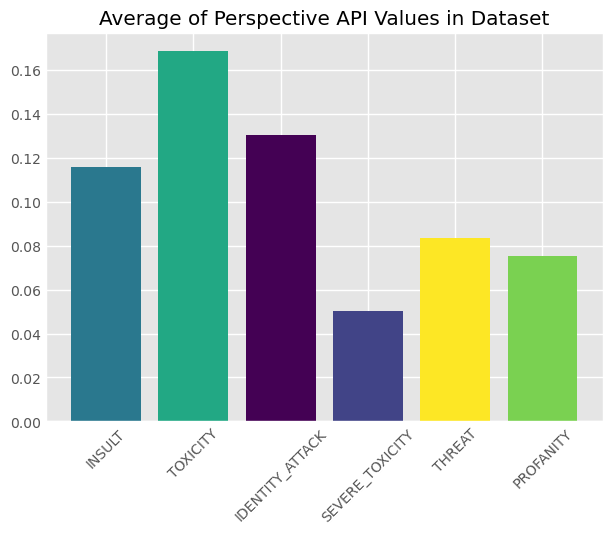

In [560]:
plt.title("Average of Perspective API Values in Dataset")
plt.xticks(rotation = 45)
plt.bar(["INSULT", "TOXICITY", "IDENTITY_ATTACK", "SEVERE_TOXICITY", "THREAT", "PROFANITY"], perspective_label_means.to_numpy(), color=['#2a788e', '#22a884', '#440154', '#414487', '#fde725', '#7ad151'])
plt.savefig("api_averages.png",dpi=300, bbox_inches = "tight")

In [561]:
df.columns

Index(['Unnamed: 0', 'userid', 'username', 'acctdesc', 'location', 'following',
       'followers', 'totaltweets', 'usercreatedts', 'tweetid',
       'tweetcreatedts', 'retweetcount', 'text', 'hashtags', 'language',
       'coordinates', 'favorite_count', 'is_retweet', 'original_tweet_id',
       'original_tweet_userid', 'original_tweet_username',
       'in_reply_to_status_id', 'in_reply_to_user_id',
       'in_reply_to_screen_name', 'is_quote_status', 'quoted_status_id',
       'quoted_status_userid', 'quoted_status_username', 'extractedts',
       'INSULT', 'TOXICITY', 'IDENTITY_ATTACK', 'SEVERE_TOXICITY', 'THREAT',
       'PROFANITY'],
      dtype='object')

In [562]:
df['text']

1        Update from Ukraine | Major Ukrainian Attack o...
2        Here are today's control-of-terrain maps of #R...
3        ⚡️ WAR IN #UKRAINE - APR 13\n\nAverage troop l...
4        @vicktop55 #USA &amp; its #NATO allies have re...
5        Ukraine War: Dead bodies stretchered out of Ir...
                               ...                        
50006    Today Russia surrendered! putin fled from russ...
50007    .@ZelenskyyUa: #Ukraine values every person, v...
50008    🛑🛑‼️‼️\n\nSaudi-Arabien kauft russisches Öl in...
50009    #11Abr Saludos desde el frente! 🫡 Batallón Bol...
50010    Protest gegen die Verlogenheit der #Ostermaers...
Name: text, Length: 43581, dtype: object

In [563]:
# Percentage of Tweets with highest in one category

count_ins = count_tox = count_ia = count_sevtox = count_thr = count_prof = 0
count_tot = 0


defiant_mask = (df[['INSULT', 'TOXICITY', 'IDENTITY_ATTACK', 'SEVERE_TOXICITY', 'THREAT', 'PROFANITY']] > 0.5).any(axis=1)

# use the mask to filter the rows where at least one column has a value > 0.5
count_tot = len(df[defiant_mask])

# calculate the sums and counts for each column using vectorized operations
count_ins = (df['INSULT'] > 0.5).sum()
count_tox = (df['TOXICITY'] > 0.5).sum()
count_ia = (df['IDENTITY_ATTACK'] > 0.5).sum()
count_sevtox = (df['SEVERE_TOXICITY'] > 0.5).sum()
count_thr = (df['THREAT'] > 0.5).sum()
count_prof = (df['PROFANITY'] > 0.5).sum()

count_ins, count_tox, count_ia, count_sevtox, count_thr, count_prof, count_tot

(2303, 2540, 2696, 1062, 1598, 1193, 4575)

In [564]:
defiant_vals = [count_ins, count_tox, count_ia, count_sevtox, count_thr, count_prof]
defiant_percent = list(map(lambda x: (x/count_tot) * 100, defiant_vals))
defiant_percent

[50.338797814207645,
 55.51912568306011,
 58.92896174863388,
 23.21311475409836,
 34.92896174863388,
 26.076502732240435]

In [565]:
# Common words
defiant_df = df[defiant_mask]
ddf_cleaned = defiant_df.copy()

ddf_cleaned['text'] = ddf_cleaned['text'].apply(lambda x: x.lower())

In [566]:
ddf_cleaned['text']

14       trump said that he always saw in putin's words...
18       glory to ukraine and its soldiers 🇺🇦\ndeath to...
20       drohnen über übungsplätzen: #bundeswehr plant ...
35       @rusbotschaft sicherheit für alle seine mitgli...
36       #russiansarewarcriminals every single one of t...
                               ...                        
49972    liebe freunde,\n\ngegen #putin|s #angriffskrie...
49973    .\n#putin|s kleine links / rechts-faschisten v...
49986    your top 6 on your "on repeat" playlist repres...
49999    #anonymous \n#russias war crimes\n\ntargeting ...
50010    protest gegen die verlogenheit der #ostermaers...
Name: text, Length: 4575, dtype: object

In [567]:
# excluding polish, japanese, czech, korean
supported = {'en':set(stopwords.words('english')),
             'ru':set(stopwords.words('russian')),
             'es':set(stopwords.words('spanish')),
             'de':set(stopwords.words('german')),
             'fr':set(stopwords.words('french')),
             'it':set(stopwords.words('italian')),
             'pt':set(stopwords.words('portuguese')),
             'hi':set(stopwords.words('hinglish')),
             'nl':set(stopwords.words('dutch')),
             'ar':set(stopwords.words('arabic')),
             'zh':set(stopwords.words('chinese')),
             'sv':set(stopwords.words('swedish'))}

p.set_options(p.OPT.URL, 
              p.OPT.EMOJI,
              p.OPT.MENTION,
              p.OPT.HASHTAG,
              p.OPT.SMILEY,
              p.OPT.NUMBER,
              p.OPT.RESERVED)

def remove_stopwords_punc(sentence, language):
    sentence = re.sub(r'&amp;', '', sentence)
    sentence = p.clean(sentence)
    sentence = sentence.lower()
    sentence = re.sub(r'[^\w\s]', ' ', sentence)
    #sentence = re.sub(r'\n', ' ', sentence)
    #sentence = re.sub(' +', ' ', sentence)
    sentence = sentence.strip()
    if language in supported.keys():
        tokenized = nltk.word_tokenize(sentence)
        filtered = [word for word in tokenized if word not in supported[language]]
        return ' '.join(filtered)
    else:
        return sentence


def lemmatizer(sentence, language):
    return ' '.join(simplemma.text_lemmatizer(sentence, lang=language))


def sanitize(sentence, language):
    return lemmatizer(remove_stopwords_punc(sentence, language), language)

sanitize('Why did you allow #Russian leaders back on the platform lifting #Twitters regulations against #Putin and #Russian officials\n4. Why are you not abiding by sanctions https://t.co/3pIyNBtjWp                          644#Anonymous \n#Russias War Crimes\n\nTargeting and killing civilians\n\nTargeted destruction of civilian buildings\n\nRussian soldiers raping women and children\n\n#Ukrainians kidnapped, taken to Russia\n\nBlocking humanitarian aid to Ukrainians\n\nTargeting and killing journalists #Ukraine https://t.co/qmqoUEYZ3q', 'en')

'allow leader back platform lift regulation official abide sanction war crime target kill civilian target destruction civilian building russian soldier rape woman child kidnap take russia block humanitarian aid ukrainians target kill journalist'

In [568]:
ddf_cleaned['text'] = ddf_cleaned['text'].astype(str)
ddf_cleaned['language'] = ddf_cleaned['language'].astype(str)
ddf_cleaned = ddf_cleaned.apply(lambda x: sanitize(x['text'], x['language']), axis=1)
ddf_cleaned = ddf_cleaned.apply(lambda x: x.lower())

language not supported: ja
language not supported: ko
language not supported: ar
language not supported: ja
language not supported: ko
language not supported: zh
language not supported: zh
language not supported: ja
language not supported: ja
language not supported: ja
language not supported: ja
language not supported: ko
language not supported: zh
language not supported: zh
language not supported: zh
language not supported: zh
language not supported: zh
language not supported: zh
language not supported: zh
language not supported: zh
language not supported: zh
language not supported: zh
language not supported: zh
language not supported: zh
language not supported: zh
language not supported: zh
language not supported: zh
language not supported: zh
language not supported: ko
language not supported: ar
language not supported: ar
language not supported: zh
language not supported: zh
language not supported: ko
language not supported: ko
language not supported: ko
language not supported: ko
l

In [569]:
common_words_tuple_list = Counter(" ".join(ddf_cleaned).split()).most_common(200)
common_words_tuple_list

[('target', 1095),
 ('kill', 868),
 ('russian', 778),
 ('civilian', 752),
 ('russia', 713),
 ('war', 527),
 ('soldier', 519),
 ('crime', 438),
 ('ukrainians', 438),
 ('child', 422),
 ('rape', 406),
 ('take', 390),
 ('destruction', 378),
 ('journalist', 370),
 ('kidnap', 366),
 ('building', 365),
 ('humanitarian', 365),
 ('block', 363),
 ('aid', 363),
 ('womenand', 362),
 ('fr', 332),
 ('ukraine', 285),
 ('russians', 283),
 ('putin', 259),
 ('video', 244),
 ('ukrainian', 239),
 ('fuck', 214),
 ('russisch', 197),
 ('say', 195),
 ('people', 177),
 ('russland', 160),
 ('werden', 158),
 ('mehr', 155),
 ('ber', 144),
 ('like', 140),
 ('one', 139),
 ('terrorist', 139),
 ('kriegen', 136),
 ('see', 125),
 ('wer', 124),
 ('link', 115),
 ('ukrainisch', 115),
 ('get', 110),
 ('comment', 110),
 ('world', 107),
 ('head', 105),
 ('go', 102),
 ('day', 100),
 ('still', 99),
 ('good', 99),
 ('stupid', 98),
 ('support', 96),
 ('soldat', 95),
 ('s', 94),
 ('propaganda', 90),
 ('stop', 89),
 ('ganz', 89),


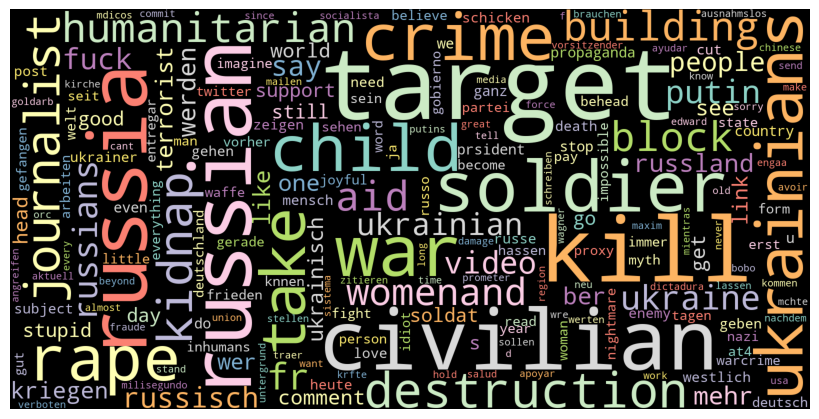

In [570]:
freq_dict = dict(common_words_tuple_list)

wordcloud = WordCloud(width=1600,height=800,max_font_size=200,colormap='Set3').generate_from_frequencies(freq_dict)
plt.figure(figsize = (8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.savefig("tweet_wc.png",dpi=300, bbox_inches = "tight")
plt.show()

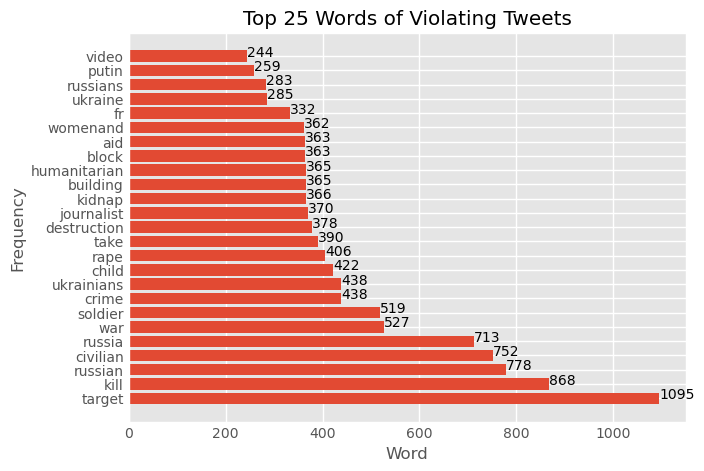

In [571]:
freq_50_dict = dict(Counter(" ".join(ddf_cleaned).split()).most_common(25))
freq_words = list(freq_50_dict.keys())
freq_vals = list(freq_50_dict.values())
style.use('ggplot')
plt.barh(freq_words, freq_vals)
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.title('Top 25 Words of Violating Tweets')
for index, value in enumerate(freq_vals):
    plt.text(value, index, str(value))
plt.savefig("top25.png",dpi=300, bbox_inches = "tight")
plt.show()

In [572]:
# Same Tweets
#non_rt = df[df['is_retweet'] == 'False']
repeated_count = ddf_cleaned.value_counts()
repeated_count
repeated_count[repeated_count > 5].head(10)

war crime target kill civilian target destruction civilian building russian soldier rape womenand child kidnap take russia block humanitarian aid ukrainians target kill journalist    362
                                                                                                                                                                                       219
one warcrime russians impossible imagine even nightmare russian inhumans cut head ukrainian soldier still believe myth russians read joyful comment post                                57
gobierno apoyar mientras prometer entregar sistema salud traer mdicos ayudar dictadura milisegundo fraude socialista engaa bobo                                                         49
gerade maxim goldarb schreiben aktuell vorsitzender union link krfte ausnahmslos link partei verboten werden untergrund arbeiten zitieren mailen nachdem prsident                       43
sorry fault cant bang ugly wife love                             

In [573]:
repeated_count = df['text'].value_counts()
repeated_count
repeated_count[repeated_count > 5].head(10)

text
To @elonmusk\n\n1. Is this a violation of TOS calling for genocide of #Ukraine\n2. How is a terrorist state verified\n3. Why did you allow #Russian leaders back on the platform lifting #Twitters regulations against #Putin and #Russian officials\n4. Why are you not abiding by sanctions https://t.co/3pIyNBtjWp                          644
#Anonymous \n#Russias War Crimes\n\nTargeting and killing civilians\n\nTargeted destruction of civilian buildings\n\nRussian soldiers raping women and children\n\n#Ukrainians kidnapped, taken to Russia\n\nBlocking humanitarian aid to Ukrainians\n\nTargeting and killing journalists #Ukraine https://t.co/qmqoUEYZ3q                     361
I guess pocketing $100, $200, and 300 million of OUR TAX DOLLARS just wasn't enough to get by for #Zelensky.\n\nHe's absconded with $400 million for himself personally - and counting. 🙃\n\nOh, and then there are the known 35 generals &amp; senior #Ukrainian officials underneath him… https://t.co/b3EWT1gMro https://t

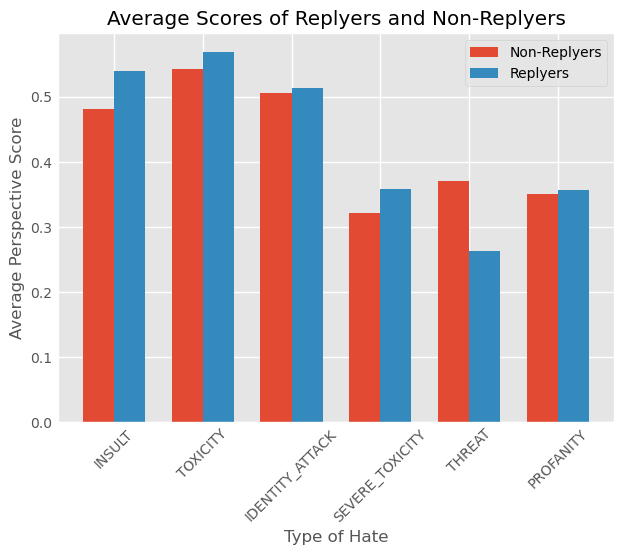

In [574]:
# Replyers that are toxic
#non_defiant_mask = (df[['INSULT', 'TOXICITY', 'IDENTITY_ATTACK', 'SEVERE_TOXICITY', 'THREAT', 'PROFANITY']] <= 0.5).any(axis=1)
#replyers = df[]
type_of_defiance = ["INSULT", "TOXICITY", "IDENTITY_ATTACK", "SEVERE_TOXICITY", "THREAT", "PROFANITY"]
defiant_replyers = defiant_df[defiant_df['in_reply_to_screen_name'].notnull()]
defiant_non_replyers = defiant_df[defiant_df['in_reply_to_screen_name'].isnull()]

nr_vals = []
r_vals = []

for defiance_type in type_of_defiance:
    nr_mean = defiant_non_replyers[defiance_type].mean()
    r_mean = defiant_replyers[defiance_type].mean()
    nr_vals.append(nr_mean)
    r_vals.append(r_mean)

bar_width = 0.35
x1 = np.arange(len(type_of_defiance))
fig, ax = plt.subplots()
ax.bar(x1, nr_vals, width=bar_width, label='Non-Replyers')
ax.bar(x1+bar_width, r_vals, width=bar_width, label='Replyers')
ax.set_xlabel('Type of Hate')
ax.set_ylabel('Average Perspective Score')
ax.set_title('Average Scores of Replyers and Non-Replyers')
ax.set_xticks(x1 + bar_width / 2)
ax.set_xticklabels(type_of_defiance, rotation=45)
ax.legend()

# Show the plot
plt.show()



In [575]:
df[df['TOXICITY'] > 0.8]['text']

320      Idź się pieprzyć, Putin!\n(Polish)\n\n#FuckPut...
614      Not fucking putin, but ordinary russians kill ...
728      #FuckPutin get it going he ruins my wonderful ...
775      あなた自身をファックして、プーチン！\n(Japanese)\n\n#StandWithUk...
1623     #UkraineRussianWar 🕶️⚡️Бахмут. Вокруг нп у пид...
                               ...                        
48574    You're a fucking idiot if you vote for a pro-#...
49036    去他妈的，普京！\n(Chinese Simplified)\n\n#StandWithUk...
49096    @knut_konig Habe ich schon dazu Stellung genom...
49603    Pergi Fuck Yourself, Putin!\n(Malay)\n\n#Putin...
49758    Vai a scopare te stesso, Putin!\n(Italian)\n\n...
Name: text, Length: 263, dtype: object

In [305]:
language_counts = df['language'].value_counts()
language_counts

language
en                     30518
fr                      3377
de                      3028
es                      2899
it                      1712
ru                       717
pt                       276
pl                       225
ja                       218
hi                       160
nl                       129
ar                        86
sv                        68
zh                        60
cs                        59
ko                        42
0                          4
True                       2
1645015236741562368        1
Name: count, dtype: int64

In [306]:
df

,Unnamed: 0,userid,username,acctdesc,location,following,followers,totaltweets,usercreatedts,tweetid,...,quoted_status_id,quoted_status_userid,quoted_status_username,extractedts,INSULT,TOXICITY,IDENTITY_ATTACK,SEVERE_TOXICITY,THREAT,PROFANITY
1,244270,1630078764464975874,AsadElhasi90,لا اله الا انت سبحانك أني كنت من الظالمين,libya,80,11,6622,2023-02-27 05:34:04,1646996698395230209,...,0,0.0,NaN,2023-04-15 01:53:57.844156,0.016785,0.072128,0.041777,0.004463,0.034422,0.014088
2,162238,3823392983,fgafatg,NaN,"Barcelona, Països Catalans",3626,3889,127199,2015-09-30 10:46:38,1646008872509865984,...,0,0.0,NaN,2023-04-12 05:28:13.769648,0.019870,0.087956,0.048738,0.004635,0.024753,0.023311
3,200210,845225862,jpeter1son,Veteran denouncer of pronounced nonsense\nNot ...,"Langley, VA",4053,3513,16091,2012-09-25 10:02:32,1646462925492613121,...,0,0.0,NaN,2023-04-13 11:15:42.154391,0.006553,0.012755,0.004125,0.001125,0.007508,0.011356
4,200417,1641117312219586564,DavidSt80377567,TRUMP 2024 \nAfter the Awakening...comes the R...,"Atlanta, GA",341,68,2448,2023-03-29 16:37:59,1645788927205466120,...,0,0.0,NaN,2023-04-11 15:13:06.092485,0.338892,0.351861,0.063859,0.007896,0.011586,0.098996
5,189150,1617983384852090882,Hi45733134,NaN,NaN,2,11,14823,2023-01-24 20:31:26,1646430040253407232,...,0,0.0,NaN,2023-04-13 09:48:25.274684,0.025671,0.096118,0.051581,0.008888,0.085497,0.027820
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50006,176462,1627943524653056002,Elmimoni1,NaN,NaN,121,17,2903,2023-02-21 08:09:30,1646817845064474624,...,0,0.0,NaN,2023-04-14 15:12:30.325212,0.026574,0.082417,0.028017,0.004482,0.013425,0.019349
50007,285401,2302714244,Artemasbohdan,A member of the Armed Forces of Ukraine 🇺🇦 Glo...,NaN,39,256,208,2014-01-21 08:11:02,1646292230599057409,...,0,0.0,NaN,2023-04-13 00:29:53.211600,0.010211,0.027678,0.018370,0.002337,0.009567,0.019007
50008,234219,1483716350837243906,quequettasse,NaN,NaN,61,15,7597,2022-01-19 08:22:18,1645872211901972480,...,0,0.0,NaN,2023-04-11 20:12:38.131912,0.075070,0.123632,0.298926,0.078837,0.160315,0.053066
50009,161441,1612180935482515460,freddi27120928,NaN,NaN,320,90,8841,2023-01-08 20:14:49,1646316822017241088,...,0,0.0,NaN,2023-04-13 02:30:02.055715,0.006316,0.005246,0.001360,0.000467,0.005628,0.010228


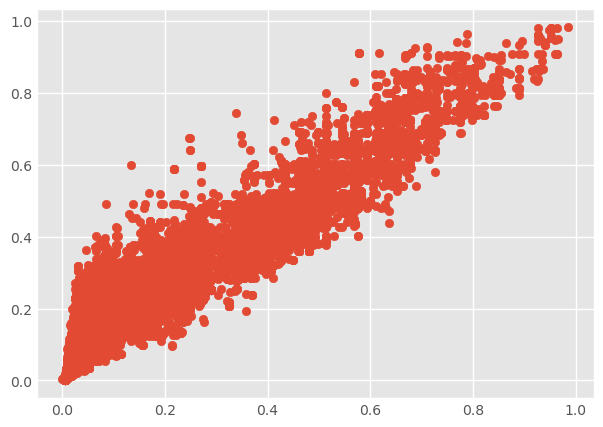

In [312]:
#df['INSULT'], df['TOXICITY']

fig, ax = plt.subplots()
ax.scatter(df['INSULT'], df['TOXICITY'])

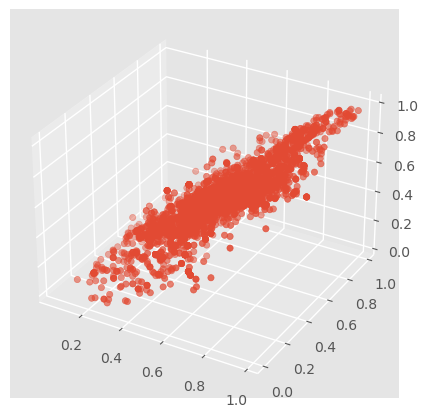

In [408]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(defiant_df['TOXICITY'], defiant_df['IDENTITY_ATTACK'], defiant_df['INSULT'])
#r, p = sp.stats.pearsonr(x=np.nan_to_num(defiant_df['TOXICITY']), y=np.nan_to_num(defiant_df['IDENTITY_ATTACK']))
#r, p

In [ ]:
sum_of_squares = []
clusterN = range(1,15)
for n in clusterN:
    kmeans = KMeans(n_clusters=n)
    kmeans.fit(np.nan_to_num(defiant_df[['TOXICITY','INSULT','IDENTITY_ATTACK']]))
    sum_of_squares.append(kmeans.inertia_)

plt.plot(K,sum_of_squares,  marker='o')
plt.xlabel('K') 
plt.ylabel('SSE/Inertia') 
plt.title('Elbow Plot')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=6).fit(np.nan_to_num(defiant_df[['TOXICITY','INSULT','IDENTITY_ATTACK']]))
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.dist = 12
ax.set_xlabel('TOXICITY')
ax.set_ylabel('INSULT')
ax.set_zlabel('IDENTITY_ATTACK')
ax.set_title('Clustering of Top Three Violating')
ax.scatter(defiant_df['TOXICITY'], defiant_df['INSULT'], defiant_df['IDENTITY_ATTACK'], c=kmeans.labels_)
plt.savefig("3clustering.png",dpi=300, bbox_inches = "tight")

(0.8717102894103644, 0.0)

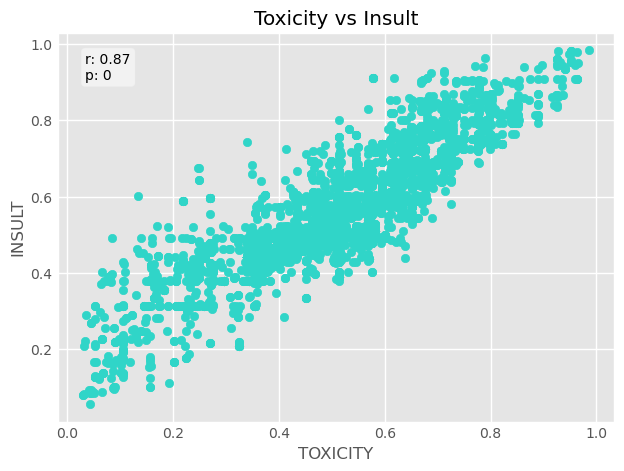

In [506]:
fig, ax = plt.subplots()
props = dict(boxstyle='round', facecolor='white', alpha=0.5)
ax.scatter(defiant_df['INSULT'], defiant_df['TOXICITY'], c='#30D5C8')
ax.set_xlabel('TOXICITY')
ax.set_ylabel('INSULT')
ax.set_title('Toxicity vs Insult')
r, p = sp.stats.pearsonr(x=np.nan_to_num(defiant_df['INSULT']), y=np.nan_to_num(defiant_df['TOXICITY']))
ax.text(0.05, 0.95, 'r: '+str(round(r,2))+'\n'+'p: '+str(round(p)), transform=ax.transAxes, fontsize=10,
        verticalalignment='top', bbox=props)
plt.savefig("toxinsultscatter.png",dpi=300, bbox_inches = "tight")
r, p

(0.3171442426063479, 2.01624591782971e-107)

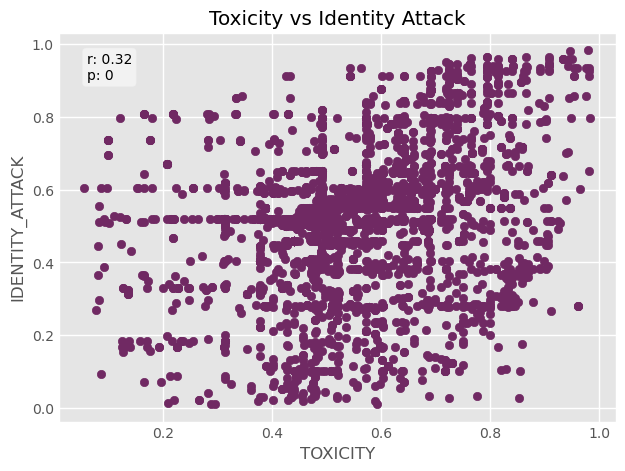

In [507]:
fig, ax = plt.subplots()
ax.scatter(defiant_df['TOXICITY'], defiant_df['IDENTITY_ATTACK'], c='#702963')
ax.set_xlabel('TOXICITY')
ax.set_ylabel('IDENTITY_ATTACK')
ax.set_title('Toxicity vs Identity Attack')
r, p = sp.stats.pearsonr(x=np.nan_to_num(defiant_df['TOXICITY']), y=np.nan_to_num(defiant_df['IDENTITY_ATTACK']))
ax.text(0.05, 0.95, 'r: '+str(round(r,2))+'\n'+'p: '+str(round(p)), transform=ax.transAxes, fontsize=10,
        verticalalignment='top', bbox=props)
plt.savefig("toxiascatter.png",dpi=300, bbox_inches = "tight")
r, p

(0.3162658564968519, 8.314364277862998e-107)

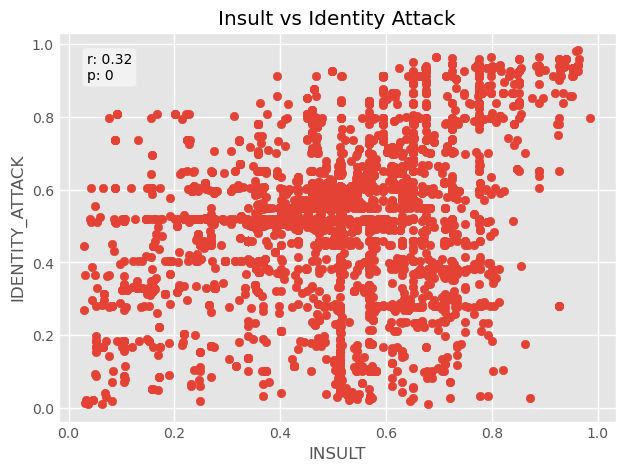

In [508]:
fig, ax = plt.subplots()
ax.scatter(defiant_df['INSULT'], defiant_df['IDENTITY_ATTACK'], c='#E34234')
ax.set_xlabel('INSULT')
ax.set_ylabel('IDENTITY_ATTACK')
ax.set_title('Insult vs Identity Attack')
r, p = sp.stats.pearsonr(x=np.nan_to_num(defiant_df['INSULT']), y=np.nan_to_num(defiant_df['IDENTITY_ATTACK']))
ax.text(0.05, 0.95, 'r: '+str(round(r,2))+'\n'+'p: '+str(round(p)), transform=ax.transAxes, fontsize=10,
        verticalalignment='top', bbox=props)
plt.savefig("insiascatter.png",dpi=300, bbox_inches = "tight")
r, p